In [1]:
import numpy
from keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(10)
log_filepath  = './nin'

Using TensorFlow backend.


In [2]:
(X_img_train, y_label_train), (X_img_test, y_label_test) = cifar10.load_data()

In [3]:
print("train data:",'images:',X_img_train.shape," labels:",y_label_train.shape) 
print("test  data:",'images:',X_img_test.shape ," labels:",y_label_test.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


In [4]:
X_img_train_normalize = X_img_train.astype('float32') / 255.0
X_img_test_normalize = X_img_test.astype('float32') / 255.0

In [5]:
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)

In [6]:
y_label_test_OneHot.shape

(10000, 10)

In [7]:
from keras.callbacks import TensorBoard
tb_cb = TensorBoard(log_dir=log_filepath, histogram_freq=1)
cbks = [tb_cb]

In [8]:
import keras 
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Input
from keras.layers import ZeroPadding2D
from keras.models import Model
from keras.layers import Dropout
from models import nin_cifar

In [9]:
model=nin_cifar(input_shape=(32,32,3),classes=10)
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 16, 16, 192)       14592     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 160)       30880     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 96)        15456     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 96)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 8, 96)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 192)         460992    
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 192)         37056     
__________

In [10]:
train_history=model.fit(X_img_train_normalize ,y_label_train_OneHot, epochs = 150,validation_split=0.2,verbose=1,batch_size=128,callbacks=cbks)

Train on 40000 samples, validate on 10000 samples
Epoch 1/150
40000/40000 [==============================] - 276s 7ms/step - loss: 2.4244 - acc: 0.0976 - val_loss: 2.4239 - val_acc: 0.1039
Epoch 2/150
40000/40000 [==============================] - 276s 7ms/step - loss: 2.4239 - acc: 0.1114 - val_loss: 2.4235 - val_acc: 0.1076
Epoch 3/150
40000/40000 [==============================] - 276s 7ms/step - loss: 2.4233 - acc: 0.1264 - val_loss: 2.4226 - val_acc: 0.1264
Epoch 4/150
40000/40000 [==============================] - 275s 7ms/step - loss: 2.4224 - acc: 0.1534 - val_loss: 2.4209 - val_acc: 0.1448
Epoch 5/150
40000/40000 [==============================] - 276s 7ms/step - loss: 2.4201 - acc: 0.1693 - val_loss: 2.4166 - val_acc: 0.1733
Epoch 6/150
40000/40000 [==============================] - 276s 7ms/step - loss: 2.4134 - acc: 0.1755 - val_loss: 2.4049 - val_acc: 0.1749
Epoch 7/150
40000/40000 [==============================] - 277s 7ms/step - loss: 2.3913 - acc: 0.1764 - val_loss: 2.

40000/40000 [==============================] - 284s 7ms/step - loss: 1.0004 - acc: 0.6902 - val_loss: 1.0681 - val_acc: 0.6643
Epoch 118/150
40000/40000 [==============================] - 289s 7ms/step - loss: 0.9997 - acc: 0.6922 - val_loss: 1.0246 - val_acc: 0.6825
Epoch 119/150
40000/40000 [==============================] - 284s 7ms/step - loss: 0.9990 - acc: 0.6932 - val_loss: 1.0401 - val_acc: 0.6815
Epoch 120/150
40000/40000 [==============================] - 285s 7ms/step - loss: 0.9949 - acc: 0.6927 - val_loss: 1.0182 - val_acc: 0.6838
Epoch 121/150
40000/40000 [==============================] - 288s 7ms/step - loss: 0.9888 - acc: 0.6968 - val_loss: 1.0073 - val_acc: 0.6902
Epoch 122/150
40000/40000 [==============================] - 283s 7ms/step - loss: 0.9923 - acc: 0.6939 - val_loss: 1.0130 - val_acc: 0.6880
Epoch 123/150
40000/40000 [==============================] - 284s 7ms/step - loss: 0.9847 - acc: 0.6967 - val_loss: 1.0801 - val_acc: 0.6684
Epoch 124/150
40000/40000 [

In [11]:
#X_img_test_normalize
#y_label_test_OneHot
preds=model.evaluate(X_img_test_normalize,y_label_test_OneHot)
print("Validation loss="+str(preds[0]))
print("Validation accuracy="+str(preds[1]))

10000/10000 [==============================] - 18s 2ms/step
Validation loss=1.05886196251
Validation accuracy=0.6782


In [12]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

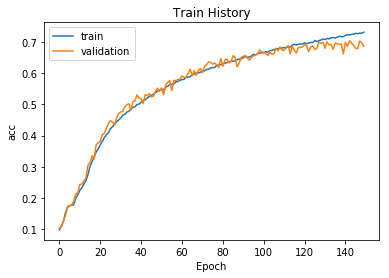

In [13]:
show_train_history(train_history,'acc','val_acc')

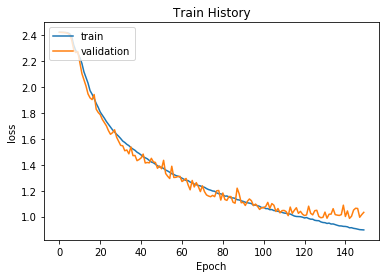

In [14]:
show_train_history(train_history,'loss','val_loss')

In [15]:
label_dict={0:"airplane",1:"automobile",2:"bird",3:"cat",4:"deer",
            5:"dog",6:"frog",7:"horse",8:"ship",9:"truck"}

In [16]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,
                                  idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx],cmap='binary')
                
        title=str(i)+','+label_dict[labels[idx][0]]
        if len(prediction)>0:
            title+='=>'+label_dict[prediction[idx]]
            
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

In [17]:
prediction=model.predict_classes(X_img_test_normalize)

10000/10000 [==============================] - 17s 2ms/step


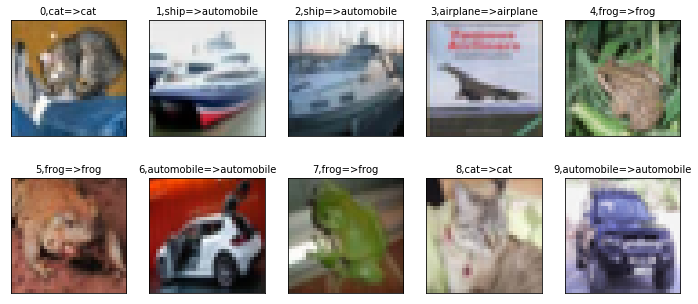

In [18]:
plot_images_labels_prediction(X_img_test,y_label_test,
                              prediction,0,10)

In [19]:
import pandas as pd
pd.crosstab(y_label_test.reshape(-1),prediction,
            rownames=['label'],colnames=['predicat'])

predicat,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,723,27,46,23,10,5,32,11,59,64
1,13,831,0,6,1,4,20,3,11,111
2,54,9,514,56,51,61,194,28,12,21
3,11,16,52,452,23,153,207,38,8,40
4,19,5,73,74,470,32,225,82,13,7
5,11,6,29,165,28,562,124,50,7,18
6,5,5,17,25,6,17,911,5,3,6
7,15,7,16,36,26,62,44,751,0,43
8,61,65,7,11,7,6,16,4,768,55
